In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




In [ ]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [ ]:
print("Total missing values in X:", X.isnull().sum().sum())
print("Total missing values in y:", y.isnull().sum())

Total missing values in X: 0
Total missing values in y: 0


In [ ]:
X = X / 255.0
print("Pixel values in X normalized to the range [0, 1].")

Pixel values in X normalized to the range [0, 1].


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100) # Reduce to 100 principal components
X_pca = pca.fit_transform(X)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")

Original number of features: 784
Reduced number of features: 100


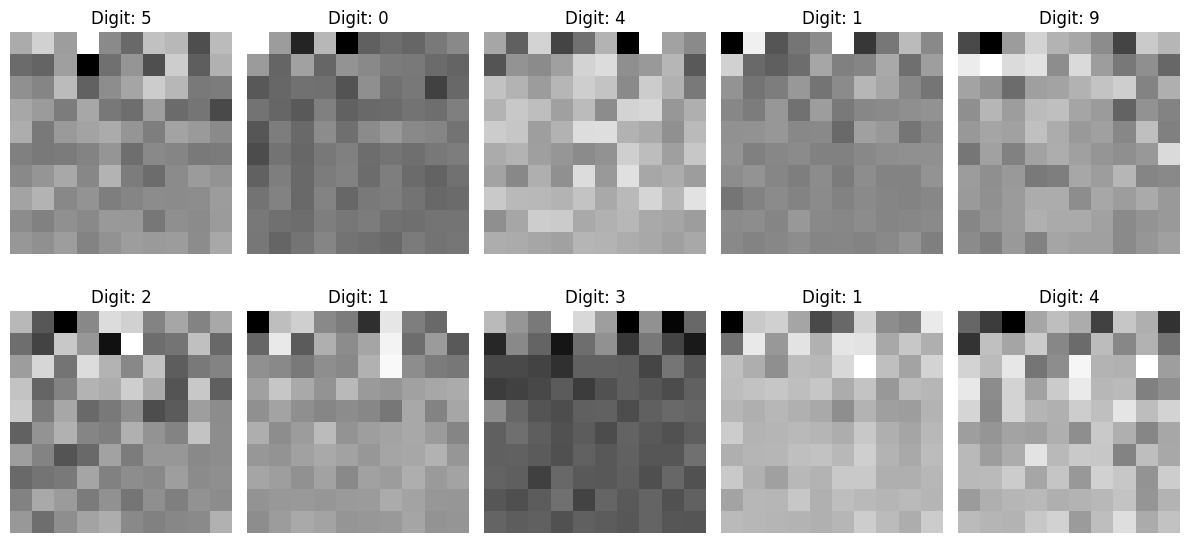

In [ ]:
import matplotlib.pyplot as plt

# Select the first 10 sample images and their labels
num_samples = 10
sample_images = X_pca[:num_samples]
sample_labels = y.iloc[:num_samples] # Changed to explicitly use .iloc

plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1) # Arrange in a 2x5 grid
    image_data = sample_images[i].reshape(10, 10) # Reshape 100 components to 10x10 image
    plt.imshow(image_data, cmap='gray')
    plt.title(f"Digit: {sample_labels.iloc[i]}")
    plt.axis('off') # Hide axes for cleaner visualization

plt.tight_layout()
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9748571428571429
